## About Dataset
[link](https://www.kaggle.com/datasets/sshikamaru/fruit-recognition)


- Dataset contain Total number of images: 22495.

- Training set size: 16854 images (one fruit or vegetable per image).

- Test set size: 5641 images (one fruit or vegetable per image).

- Number of classes: 33 (fruits and vegetables).

- Image size: 100x100 pixels.

- Training data filename format: [fruit/vegetable name]_[id].jpg (e.g. Apple Braeburn_100.jpg). Many images are also rotated, to help training.

- Testing data filename format: [4 digit id].jpg (e.g. 0001.jpg)

### Content

- train - the training folder that contains 33 subfolders in which training images for each fruit/vegetable are located. There is a total of 16854 images.

- test - the testing folder that contains 5641 testing images

- sampleSubmission.csv - a sample submission file in the correct format, with id number and string label

Our Goal is to build CNN model that classifies the fruits correctly with high validation accuracy.

### Libraries Used

In [1]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img
from tensorflow.keras.models import load_model
import warnings
warnings.filterwarnings("ignore")
import pathlib
import PIL
import matplotlib.pyplot as plt

### Reading Directory

In [2]:
trainDirectory = '../input/fruit-recognition/train/train'

# creating black image

imageHeight = 100
imageWidth = 100
thickness = 3
inputShape = (imageHeight, imageWidth, thickness)

#### Applying Image Augmentation Techniques to increase the size of training set and help improve the performance of deep learning model.

imageDataGenerator is used for data preprocessing and image augmentation on training images.
rescale=1./255 rescales pixel values to be between 0 and 1.
vertical_flip=True performs random vertical flips on the images.
horizontal_flip=True performs random horizontal flips.
rotation_range=40 randomly rotates the image by up to 40 degrees.
width_shift_range=0.2 and height_shift_range=0.2 randomly shift the width and height of the images by up to 20%.
zoom_range=0.1 randomly zooms the images by up to 10%.

In [3]:
imageDataGenerator = ImageDataGenerator(rescale=1./255,
                                vertical_flip=True,
                                horizontal_flip=True,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                zoom_range=0.1,
                                validation_split=0.2)
# code explaination

# imageDataGenerator is used for data preprocessing and image augmentation on training images.
# rescale=1./255 rescales pixel values to be between 0 and 1.
# vertical_flip=True performs random vertical flips on the images.
# horizontal_flip=True performs random horizontal flips.
# rotation_range=40 randomly rotates the image by up to 40 degrees.
# width_shift_range=0.2 and height_shift_range=0.2 randomly shift the width and height of the images by up to 20%.
# zoom_range=0.1 randomly zooms the images by up to 10%.

testDataGenerator = ImageDataGenerator(rescale=1./255)

# testDataGenerator is used for data preprocessing on test images, and only rescales the pixel values to be between 0 and 1 using rescale=1./255.

In [4]:
trainGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=32,
                                                 subset='training',
                                                 target_size=(100, 100))

validGenerator = imageDataGenerator.flow_from_directory(trainDirectory,
                                                 shuffle=True,
                                                 batch_size=16,
                                                 subset='validation',
                                                 target_size=(100, 100))

# code explaination

# flow_from_directory() is a method of ImageDataGenerator and DirectoryIterator classes in the Keras library for loading and augmenting image data from a directory during model training or prediction.
# it takes so many arguments like:

# directory: the path to the directory containing the images.
# target_size: the size to which the images should be resized.
# color_mode: the color mode of the images ('rgb' or 'grayscale').
# batch_size: the number of images in each batch.
# shuffle: whether to shuffle the order of the images.
# class_mode: the type of label to use ('categorical', 'binary', 'sparse', or None).
# subset: whether to load a subset of the images ('training' or 'validation').

Found 13493 images belonging to 33 classes.
Found 3361 images belonging to 33 classes.


In [5]:
model = Sequential()

model.add(Conv2D(64, (5, 5), activation='relu', padding='Same', input_shape=inputShape))
model.add(Conv2D(64, (5, 5), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(Conv2D(128, (3, 3), activation='relu', padding='Same'))
model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(33, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(1e-4), metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 100, 100, 64)      4864      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 64)      102464    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 50, 50, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 50, 50, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 50, 50, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 50, 50, 128)       147584    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 25, 25, 128)       0

This code defines a deep convolutional neural network (CNN) using the Keras Sequential model API for image classification that consists of 12 layer

- Sequential(): creates an empty model object that can be used to stack layers.

- Conv2D(): adds a 2D convolutional layer with 64 filters, kernel size (5,5), ReLU activation, and 'same' padding to the model.

padding parameter in the Conv2D layers is set to 'Same'. This means that the output of the convolutional operation will have the same spatial dimensions (height and width) as the input, by adding zero-padding to the input image so that the convolutional filter can be applied to every pixel.

This padding strategy can be useful in preserving the spatial resolution of the input image, which may be important in certain types of computer vision tasks, such as object detection or segmentation, where the exact location of objects in the image is important

- followed by another Conv2D() layer with the same configuration. Both layers are connected to the input layer, which has a shape specified by the inputShape argument.

- MaxPooling2D(): adds a 2D max pooling layer with pool size (2,2) to the model.

- followed by a Dropout(): layer that randomly drops 25% of the input units to prevent overfitting.

- The same pattern of two Conv2D() layers, a MaxPooling2D() layer, and a Dropout() layer is repeated with 128 filters and a smaller kernel size of (3,3) in the next block of the network.

- Flatten() flattens the output of the previous layers into a 1D array.

- Dense() adds a fully connected layer with 256 neurons and ReLU activation, followed by a Dropout() layer that randomly drops 50% of the input units.

- Dense(): adds another fully connected layer with 33 neurons and softmax activation, which is used to output the predicted probabilities for each class label.

- compile(): configures the learning process for the model.

- loss='categorical_crossentropy' specifies the loss function to use, which is appropriate for multi-class classification.

- optimizer = tf.keras.optimizers.Adam(1e-4): specifies the optimizer to use, which is Adam with a learning rate of 1e-4 (0.0001).

- metrics=['accuracy'] specifies the evaluation metric to use during training.

- model.summary(): prints a summary of the model architecture, including the number of trainable parameters in each layer.

In [6]:
early = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=3, mode='max',
                                     restore_best_weights=True)
history = model.fit(trainGenerator, validation_data=validGenerator,
                   steps_per_epoch=trainGenerator.n//trainGenerator.batch_size,
                    validation_steps=validGenerator.n//validGenerator.batch_size,
                    callbacks=[early],
                   epochs=12)

# code explaination

# EarlyStopping(): is a callback function that monitors the validation accuracy during training and stops the training process if the accuracy does not improve for patience number of epochs.
# monitor = 'val_accuracy' : specifies that the validation accuracy should be monitored.
# patience = 3 : specifies that training should be stopped if there is no improvement in accuracy for 3 consecutive epochs.
# mode = 'max' : specifies that the callback should be triggered when the accuracy stops increasing.
# restore_best_weights = True : restores the weights of the best-performing model during training.

# model.fit(): trains the model on the training data (trainGenerator) and validates it on the validation data (validGenerator).
# steps_per_epoch & validation_steps : specify how many batches of data to process before moving to the next epoch, based on the number of samples in the dataset and the batch size.

# trainGenerator.n & validGenerator.n are the total number of samples in the training and validation datasets, respectively.
# trainGenerator.batch_size & validGenerator.batch_size are the batch sizes used for training and validation, respectively.
# By dividing the total number of samples by the batch size, we can calculate how many batches of data there are in the dataset.
# This value is used to specify the steps_per_epoch and validation_steps parameters, which tell Keras how many batches of data to process before moving to the next epoch during training and validation.

# callbacks: is a list of callback functions to use during training.
# epochs=12 : specifies the number of epochs to train for.

Epoch 1/12
421/421 [==============================] - 1369s 3s/step - loss: 2.2490 - accuracy: 0.3183 - val_loss: 0.7756 - val_accuracy: 0.7777
Epoch 2/12
421/421 [==============================] - 1368s 3s/step - loss: 0.9122 - accuracy: 0.6877 - val_loss: 0.3603 - val_accuracy: 0.8836
Epoch 3/12
421/421 [==============================] - 1370s 3s/step - loss: 0.5727 - accuracy: 0.8022 - val_loss: 0.2318 - val_accuracy: 0.9310
Epoch 4/12
421/421 [==============================] - 1355s 3s/step - loss: 0.4288 - accuracy: 0.8538 - val_loss: 0.2541 - val_accuracy: 0.9122
Epoch 5/12
421/421 [==============================] - 1359s 3s/step - loss: 0.3259 - accuracy: 0.8866 - val_loss: 0.0892 - val_accuracy: 0.9714
Epoch 6/12
421/421 [==============================] - 1354s 3s/step - loss: 0.2533 - accuracy: 0.9129 - val_loss: 0.0642 - val_accuracy: 0.9857
Epoch 7/12
421/421 [==============================] - 1349s 3s/step - loss: 0.2133 - accuracy: 0.9279 - val_loss: 0.0553 - val_accuracy:

### Saving The Model

In [7]:
model.save('model_CNN_saved')

In [8]:
# loading the model we saved.
model = load_model('model_CNN_saved')

# Creating a dictionary named fruitMap that maps the integer-encoded class labels used in the training dataset to their corresponding fruit names. =
# This is done by iterating over the class_indices attribute of the trainGenerator object, which is a dictionary that maps the string class names to their integer-encoded labels. 
fruitMap = dict([(v, k) for k, v in trainGenerator.class_indices.items()])
fruitMap

# note that the keys and values of the dictionary are swapped

{0: 'Apple Braeburn',
 1: 'Apple Granny Smith',
 2: 'Apricot',
 3: 'Avocado',
 4: 'Banana',
 5: 'Blueberry',
 6: 'Cactus fruit',
 7: 'Cantaloupe',
 8: 'Cherry',
 9: 'Clementine',
 10: 'Corn',
 11: 'Cucumber Ripe',
 12: 'Grape Blue',
 13: 'Kiwi',
 14: 'Lemon',
 15: 'Limes',
 16: 'Mango',
 17: 'Onion White',
 18: 'Orange',
 19: 'Papaya',
 20: 'Passion Fruit',
 21: 'Peach',
 22: 'Pear',
 23: 'Pepper Green',
 24: 'Pepper Red',
 25: 'Pineapple',
 26: 'Plum',
 27: 'Pomegranate',
 28: 'Potato Red',
 29: 'Raspberry',
 30: 'Strawberry',
 31: 'Tomato',
 32: 'Watermelon'}

array([[9.8082411e-01, 8.2854901e-10, 6.4383812e-08, 1.6476870e-10,
        1.2097595e-11, 4.3771864e-10, 1.5383330e-08, 1.0550483e-07,
        1.0691941e-06, 3.1215025e-04, 2.3896063e-09, 3.1510150e-09,
        1.1561890e-08, 2.2640103e-08, 1.2048709e-07, 6.8119205e-11,
        1.1758626e-11, 5.5954729e-07, 6.4614449e-07, 4.9147758e-08,
        2.6027530e-10, 4.7031289e-04, 1.6853958e-06, 1.8129146e-11,
        4.2183269e-04, 8.1141299e-10, 7.3034386e-08, 1.7762495e-02,
        7.7878337e-10, 4.1074966e-09, 1.0136582e-05, 1.9457338e-04,
        9.7389288e-09]], dtype=float32)

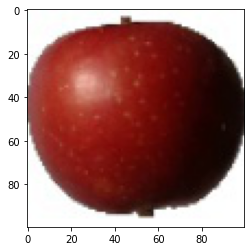

In [9]:
# loading image from file system
samplePath = pathlib.Path("../input/fruit-recognition/train/train/Apple Braeburn/Apple Braeburn_100.jpg")

# load_img(): function from the Keras library that loads the image file as a PIL (Python Imaging Library) image and resize it to a target size of (100, 100) pixels.

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

# displaying the image using imshow() function.
plt.imshow(image)

# converting the image to array and normalizes the pixel values to be between 0 and 1 using division by 255.
image = np.array(image)
image = image / 255.0

# The reshape() function is then used to add an extra dimension to the array, corresponding to the batch size.
# In this case, the batch size is set to 1, since we are processing only one image at a time and 3 are the RGB Channels of the image.
image = image.reshape(1,imageWidth,imageHeight, 3)

# Finally, the pre-trained model is used to make a prediction on the input image using the predict() function.
# The output of predict() is an array of predicted class probabilities, where each element of the array corresponds to a different class label.
predictions = model.predict(image)
predictions


#### Applying the softmax function to the output predictions of the pre-trained CNN model.

In [10]:
# The predictions variable is a NumPy array containing the model's predicted class probabilities for the input image.
# Each element of the array corresponds to a different class label, and the value of the element represents the probability that the input image belongs to that class.

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(33,), dtype=float32, numpy=
array([0.07687983, 0.02883008, 0.02883008, 0.02883008, 0.02883008,
       0.02883008, 0.02883008, 0.02883009, 0.02883011, 0.02883909,
       0.02883008, 0.02883008, 0.02883008, 0.02883008, 0.02883009,
       0.02883008, 0.02883008, 0.0288301 , 0.0288301 , 0.02883008,
       0.02883008, 0.02884365, 0.02883013, 0.02883008, 0.02884225,
       0.02883008, 0.02883008, 0.02934675, 0.02883008, 0.02883008,
       0.02883038, 0.02883569, 0.02883008], dtype=float32)>

The softmax function is a common way to convert a vector of scores or probabilities into a probability distribution, where each element of the vector is transformed into a value between 0 and 1 that represents the probability of that element being the maximum value in the vector.

The output of the softmax function is also a vector with the same length as the input vector, and the sum of its elements is equal to 1.

In [11]:
# printing out the predicted class label and the corresponding confidence score for the input image, using the score array obtained from the softmax function applied to the predicted class probabilities.

score = tf.nn.softmax(predictions[0])
print("This image is {} with a {:.2f} %".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

# np.argmax(): function returns the index of the maximum element in the score array, which corresponds to the predicted class label with the highest probability.
# np.max(predictions): function returns the highest probability value in the predictions array.
# Multiplying this value by 100 gives the confidence score for the predicted class label, expressed as a percentage.

This image is Apple Braeburn with a 98.08 %


#### Classifying Another Image.

array([[8.72086149e-15, 1.02535661e-21, 2.20130096e-20, 1.87957339e-14,
        1.97146122e-24, 8.59337259e-19, 2.00980045e-24, 1.25702335e-26,
        1.00000000e+00, 4.18114127e-22, 1.01799215e-18, 4.24846977e-17,
        3.56712340e-14, 3.58435212e-21, 6.03020119e-21, 6.23624798e-24,
        1.14122688e-28, 8.83245222e-22, 1.08230487e-17, 2.35898862e-14,
        9.51817953e-24, 1.57138593e-22, 3.78760897e-20, 2.11510005e-14,
        3.38189149e-19, 3.14461098e-24, 6.88046760e-14, 4.99633634e-20,
        6.53064732e-24, 2.60654651e-24, 6.54277685e-13, 6.07888489e-22,
        1.69655126e-25]], dtype=float32)

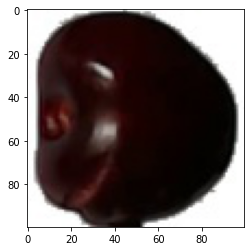

In [12]:
# loading image from file system
samplePath = pathlib.Path("../input/fruit-recognition/train/train/Cherry/Cherry_11.jpg")

# load_img(): function from the Keras library that loads the image file as a PIL (Python Imaging Library) image and resize it to a target size of (100, 100) pixels.

image = tf.keras.preprocessing.image.load_img(
    samplePath, target_size=(100, 100)
)

# displaying the image using imshow() function.
plt.imshow(image)

# converting the image to array and normalizes the pixel values to be between 0 and 1 using division by 255.
image = np.array(image)
image = image / 255.0

# The reshape() function is then used to add an extra dimension to the array, corresponding to the batch size.
# In this case, the batch size is set to 1, since we are processing only one image at a time and 3 are the RGB Channels of the image.
image = image.reshape(1,imageWidth,imageHeight, 3)

# Finally, the pre-trained model is used to make a prediction on the input image using the predict() function.
# The output of predict() is an array of predicted class probabilities, where each element of the array corresponds to a different class label.
predictions = model.predict(image)
predictions


In [13]:
# The predictions variable is a NumPy array containing the model's predicted class probabilities for the input image.
# Each element of the array corresponds to a different class label, and the value of the element represents the probability that the input image belongs to that class.

score = tf.nn.softmax(predictions[0])
score

<tf.Tensor: shape=(33,), dtype=float32, numpy=
array([0.02880327, 0.02880327, 0.02880327, 0.02880327, 0.02880327,
       0.02880327, 0.02880327, 0.02880327, 0.0782954 , 0.02880327,
       0.02880327, 0.02880327, 0.02880327, 0.02880327, 0.02880327,
       0.02880327, 0.02880327, 0.02880327, 0.02880327, 0.02880327,
       0.02880327, 0.02880327, 0.02880327, 0.02880327, 0.02880327,
       0.02880327, 0.02880327, 0.02880327, 0.02880327, 0.02880327,
       0.02880327, 0.02880327, 0.02880327], dtype=float32)>

In [14]:
# printing out the predicted class label and the corresponding confidence score for the input image, using the score array obtained from the softmax function applied to the predicted class probabilities.

score = tf.nn.softmax(predictions[0])
print("This image is {} with a {:.2f} %".format(fruitMap[np.argmax(score)],100 * np.max(predictions)))

# np.argmax(): function returns the index of the maximum element in the score array, which corresponds to the predicted class label with the highest probability.
# np.max(predictions): function returns the highest probability value in the predictions array.
# Multiplying this value by 100 gives the confidence score for the predicted class label, expressed as a percentage.

This image is Cherry with a 100.00 %


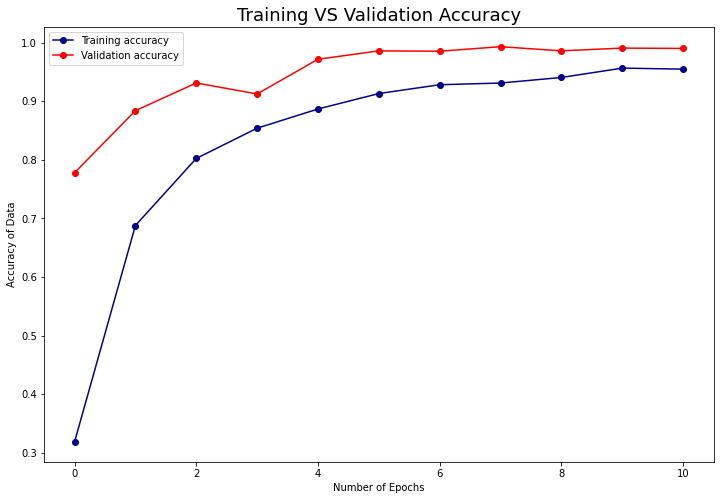

In [15]:
# plotting the data to see the accuracy of the model.

plt.figure(figsize=(12, 8))
plt.plot(history.history["accuracy"], label="Training accuracy", marker="o", color="darkblue")
plt.plot(history.history["val_accuracy"], label="Validation accuracy", marker="o", color="red")
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy of Data")
plt.title("Training VS Validation Accuracy", fontsize=18)
plt.legend()
plt.show()

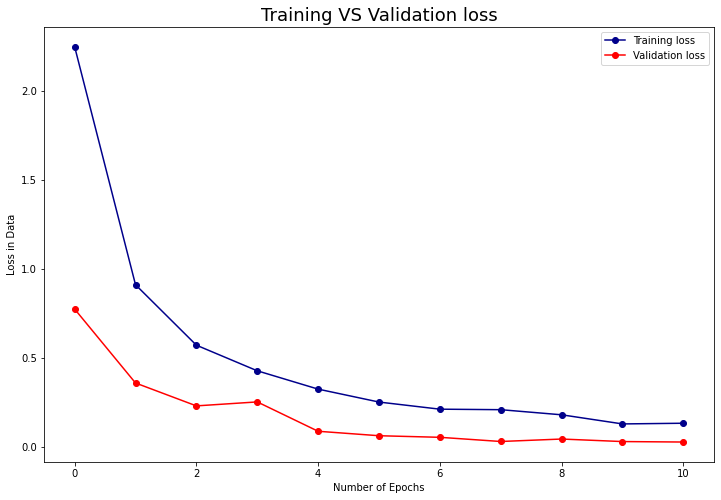

In [16]:
# plotting the data to see the lost data of the model.

plt.figure(figsize=(12, 8))
plt.plot(history.history["loss"], label="Training loss", marker="o", color="darkblue")
plt.plot(history.history["val_loss"], label="Validation loss", marker="o", color="red")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss in Data")
plt.title("Training VS Validation loss", fontsize=18)
plt.legend()
plt.show()

### Thank You and See You in Other Datasets  :)